# `Machine Learning ZoomCamp`
## `HW1_Chapter 3: Classification`

### Aileah Gotladera
-----------------------

In [33]:
# Imports
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import os

In [34]:
# Loading the data
file = 'Data/house_data.csv'
data = pd.read_csv(file)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### **Data Preparation and Data Cleaning**

In [35]:
data = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])].reset_index()
data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [36]:
# Checking null values.
data.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [37]:
# Replacing null values with 0
data = data.fillna(0)
data.isnull().sum()

index                 0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [38]:
# Apply the log transform to median_house_value.
data.median_house_value = data.median_house_value.apply(np.log1p)

In [39]:
# Fetaure and target values
X = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [40]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [41]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
dv = DictVectorizer(sparse=True)
X_train_matrix = dv.fit_transform(X_train.to_dict(orient="records"))
X_val_matrix = dv.transform(X_val.to_dict(orient="records"))

## **`Q1`**
Train a decision tree regressor to predict the median_house_value variable.
<br>Train a model with max_depth=1.
* Which feature is used for splitting the data?

In [42]:
dt = DecisionTreeRegressor(max_depth=1)

In [43]:
dt.fit(X_train_matrix, y_train)

DecisionTreeRegressor(max_depth=1)

In [44]:
feature_names = dv.get_feature_names_out()

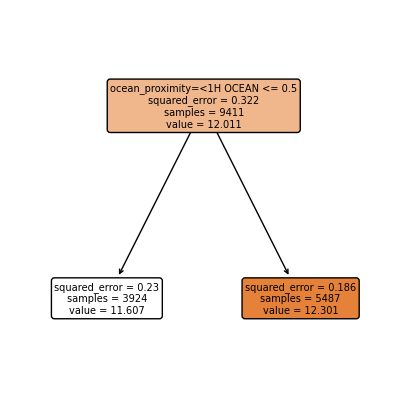

In [45]:
plt.figure(figsize=(5,5))
plot_tree(dt, filled=True, feature_names=feature_names.tolist(), rounded=True)
plt.show()

In [46]:
print('Q1 Answer: ocean_proximity')

Q1 Answer: ocean_proximity


## **`Q2`**
Train a random forest model with these parameters:
- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on validation?

In [47]:
rand_f = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rand_f.fit(X_train_matrix, y_train)
pred = rand_f.predict(X_val_matrix)
rmse = mean_squared_error(y_val, pred, squared=False)

In [48]:
print(f'Q2 ANswer: {rmse}')

Q2 ANswer: 0.23609715410821808


## **`Q3`**
Now, experiment with the n_estimators parameter
- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving? Consider 3 decimal places for retrieving the answer.

In [50]:
for n in range(10, 200, 10):
    rand_f = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rand_f.fit(X_train_matrix, y_train)
    pred = rand_f.predict(X_val_matrix)
    print("n_estimators=", n, "rmse=", round(mean_squared_error(y_val, pred, squared=False), 3))

n_estimators= 10 rmse= 0.236
n_estimators= 20 rmse= 0.232
n_estimators= 30 rmse= 0.229
n_estimators= 40 rmse= 0.228
n_estimators= 50 rmse= 0.228
n_estimators= 60 rmse= 0.228
n_estimators= 70 rmse= 0.227
n_estimators= 80 rmse= 0.227
n_estimators= 90 rmse= 0.227
n_estimators= 100 rmse= 0.227
n_estimators= 110 rmse= 0.226
n_estimators= 120 rmse= 0.226
n_estimators= 130 rmse= 0.226
n_estimators= 140 rmse= 0.226
n_estimators= 150 rmse= 0.226
n_estimators= 160 rmse= 0.226
n_estimators= 170 rmse= 0.226
n_estimators= 180 rmse= 0.226
n_estimators= 190 rmse= 0.226


In [52]:
print('Q2 Answer: 50')

Q2 Answer: 50


## **`Q4`**
Select the best max_depth:
- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
  - try different values of n_estimators from 10 till 200 (with step 10)
  - calculate the mean RMSE
- Fix the random seed: random_state=1
What's the best `max_depth`, using the mean RMSE?

In [54]:
for n in [10, 15, 20, 25]:
    score = []
    for m in np.arange(10, 200, 10):
        rand_f = RandomForestRegressor(n_estimators=n, max_depth=n, random_state=1, n_jobs=-1)
        rand_f.fit(X_train_matrix, y_train)
        pred = rand_f.predict(X_val_matrix)
        score.append(round(mean_squared_error(y_val, pred, squared=False), 3))
    print("max_depth=", n, "rmse=", np.mean(score))

max_depth= 10 rmse= 0.24600000000000008
max_depth= 15 rmse= 0.23599999999999996
max_depth= 20 rmse= 0.232
max_depth= 25 rmse= 0.23000000000000007


In [55]:
print('Q4 Answer: 25')

Q4 Answer: 25


## **`Q5`**
- Train the model with these parameters:
    - n_estimators=10,
    - max_depth=20,
    - random_state=1,
    - n_jobs=-1 (optional)
- Get the feature importance information from this model

What's the most important feature (among these 4)?

In [56]:
rand_f = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rand_f.fit(X_train_matrix, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [57]:
print(rand_f.feature_importances_)
data_features = pd.DataFrame({'feature': feature_names,'value': rand_f.feature_importances_})

data_sorted = data_features.sort_values(by="value", ascending=False)
data_sorted

[0.01332694 0.02680583 0.06716387 0.07591989 0.06568182 0.32857586
 0.25714511 0.10932298 0.02439062 0.01395677 0.01771031]


,feature,value
5,median_income,0.328576
6,ocean_proximity=<1H OCEAN,0.257145
7,ocean_proximity=INLAND,0.109323
3,latitude,0.075920
2,index,0.067164
4,longitude,0.065682
1,housing_median_age,0.026806
8,population,0.024391
10,total_rooms,0.017710
9,total_bedrooms,0.013957


In [58]:
print('Q5 Answer: median_income')

Q5 Answer: median_income


## **`Q6`**
Which eta leads to the best RMSE score on the validation dataset?

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:
- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

(change `eta` from `0.3` to `0.1`)

In [60]:
data_train = xgb.DMatrix(X_train_matrix, label=y_train)
data_val = xgb.DMatrix(X_val_matrix, label=y_val)

watchlist = [(data_train, "data_train"), (data_val, "data_val")]

In [62]:
# Training model for 100 rounds
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, data_train, num_boost_round=100, evals=watchlist)

[0]	data_train-rmse:0.44412	data_val-rmse:0.44245
[1]	data_train-rmse:0.36517	data_val-rmse:0.36812
[2]	data_train-rmse:0.31350	data_val-rmse:0.32166
[3]	data_train-rmse:0.28101	data_val-rmse:0.29484
[4]	data_train-rmse:0.26098	data_val-rmse:0.27880
[5]	data_train-rmse:0.24622	data_val-rmse:0.26927
[6]	data_train-rmse:0.23703	data_val-rmse:0.26318
[7]	data_train-rmse:0.22990	data_val-rmse:0.25889
[8]	data_train-rmse:0.22281	data_val-rmse:0.25400
[9]	data_train-rmse:0.21594	data_val-rmse:0.24969
[10]	data_train-rmse:0.21120	data_val-rmse:0.24734
[11]	data_train-rmse:0.20699	data_val-rmse:0.24517
[12]	data_train-rmse:0.20258	data_val-rmse:0.24351
[13]	data_train-rmse:0.19899	data_val-rmse:0.24207
[14]	data_train-rmse:0.19614	data_val-rmse:0.24074
[15]	data_train-rmse:0.19261	data_val-rmse:0.23974
[16]	data_train-rmse:0.19039	data_val-rmse:0.23885
[17]	data_train-rmse:0.18896	data_val-rmse:0.23810
[18]	data_train-rmse:0.18627	data_val-rmse:0.23777
[19]	data_train-rmse:0.18452	data_val-rms

In [63]:
# Changed: 0.3 to 0.1
# Now change eta from 0.3 to 0.1.
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, data_train, num_boost_round=100, evals=watchlist)

[0]	data_train-rmse:0.52468	data_val-rmse:0.52044
[1]	data_train-rmse:0.48738	data_val-rmse:0.48428
[2]	data_train-rmse:0.45447	data_val-rmse:0.45287
[3]	data_train-rmse:0.42514	data_val-rmse:0.42491
[4]	data_train-rmse:0.39933	data_val-rmse:0.40061
[5]	data_train-rmse:0.37715	data_val-rmse:0.37989
[6]	data_train-rmse:0.35715	data_val-rmse:0.36161
[7]	data_train-rmse:0.34012	data_val-rmse:0.34602
[8]	data_train-rmse:0.32496	data_val-rmse:0.33282
[9]	data_train-rmse:0.31205	data_val-rmse:0.32118
[10]	data_train-rmse:0.30064	data_val-rmse:0.31156
[11]	data_train-rmse:0.29090	data_val-rmse:0.30353
[12]	data_train-rmse:0.28198	data_val-rmse:0.29593
[13]	data_train-rmse:0.27449	data_val-rmse:0.29010
[14]	data_train-rmse:0.26724	data_val-rmse:0.28445
[15]	data_train-rmse:0.26119	data_val-rmse:0.27998
[16]	data_train-rmse:0.25616	data_val-rmse:0.27623
[17]	data_train-rmse:0.25170	data_val-rmse:0.27289
[18]	data_train-rmse:0.24727	data_val-rmse:0.26984
[19]	data_train-rmse:0.24395	data_val-rms

In [64]:
print('Q6 Answer: 0.3')

Q6 Answer: 0.3


`0.3`